DECISION TREE

In [ ]:
import pandas as pd

df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<ipython-input-24-54a989836a77>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_risk_by_glucose = df.groupby(glucose_groups)['Outcome'].mean()


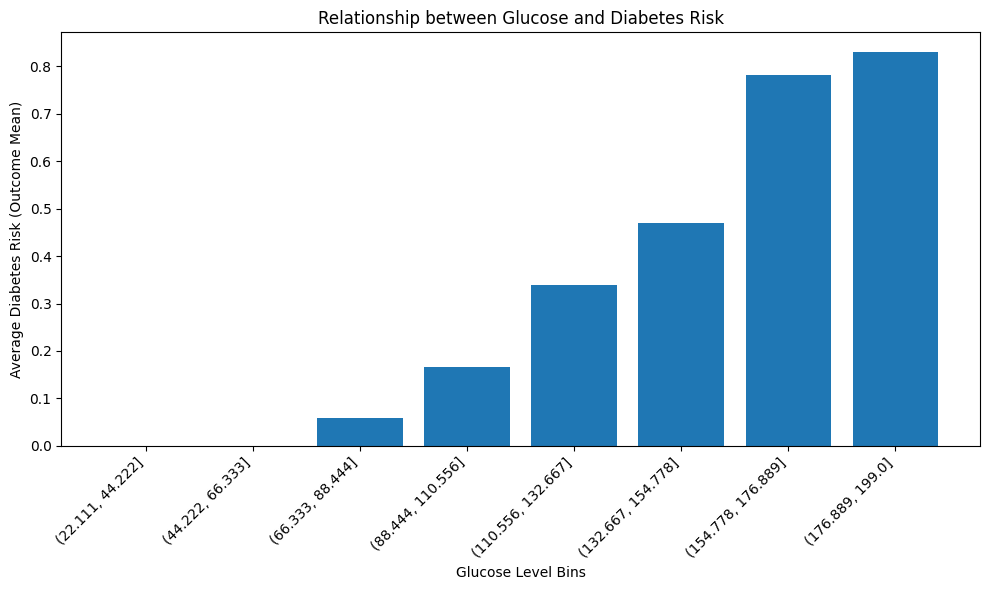

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing the data

# Create bins for glucose levels
glucose_bins = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 10)

# Group data by glucose bins and calculate the mean outcome (diabetes risk)
glucose_groups = pd.cut(df['Glucose'], bins=glucose_bins)
diabetes_risk_by_glucose = df.groupby(glucose_groups)['Outcome'].mean()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(diabetes_risk_by_glucose.index.astype(str), diabetes_risk_by_glucose.values)

plt.xlabel('Glucose Level Bins')
plt.ylabel('Average Diabetes Risk (Outcome Mean)')
plt.title('Relationship between Glucose and Diabetes Risk')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [ ]:
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [56]:
sample_data = pd.DataFrame({
    'Pregnancies': [2, 6, 1, 0, 3],
    'Glucose': [120, 180, 90, 110, 150],
    'BloodPressure': [70, 90, 60, 75, 80],
    'SkinThickness': [20, 30, 15, 0, 25],
    'Insulin': [100, 200, 80, 0, 120],
    'BMI': [30, 35, 25, 30, 32],
    'DiabetesPedigreeFunction': [0.5, 1.0, 0.3, 0.2, 0.7],
    'Age': [35, 50, 28, 30, 40]
})

predictions = model.predict(X_test) # use sample_data here for real world new values to predict
print(predictions)

[1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


In [58]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)

# Print accuracy with formatting
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\n") # Add an extra line for better readability

# Print classification report with formatting and explanations
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])
report_df.index.name = "Outcome"

# Add explanations as comments using pd.concat instead of append
legend_df = pd.DataFrame([
    {"precision": "Precision: Out of all the patients the model predicted as having/not having diabetes, what proportion actually did/did not have diabetes.",
     "recall": "Recall: Out of all the patients who actually did/did not have diabetes, what proportion did the model correctly identify?",
     "f1-score": "F1-Score: Harmonic mean/average of precision and recall, balancing both.",
     "support": "Support: Number of actual instances in the test set for each class."}],
    index=["Legend"])

report_df = pd.concat([report_df, legend_df]) # Use concat to combine DataFrames


display(report_df)

Accuracy: 75.97%




,precision,recall,f1-score,support
0,0.844444,0.767677,0.804233,99.0
1,0.640625,0.745455,0.689076,55.0
Legend,Precision: Out of all the patients the model p...,Recall: Out of all the patients who actually d...,F1-Score: Harmonic mean of precision and recal...,Support: Number of actual instances in the tes...
